<a href="https://colab.research.google.com/github/rjsdn2308/deep-learning-practice/blob/main/easy_deep_learning_principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [40]:
from tensorflow.keras.models import Sequential #keras 라이브러리의 models class에서 Sequential 함수 불러오기
from tensorflow.keras.layers import Dense, Input # layer class에서 Dense 함수 불러오기
from keras.utils import plot_model
import numpy as np # 데이터 전처리를 위해 사용하는 라이브러리 불러오기

### 2. 데이터 준비

In [41]:
!git clone https://github.com/taehojo/data.git

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16]
y = Data_set[:,16]

fatal: destination path 'data' already exists and is not an empty directory.


In [42]:
import pandas as pd

In [43]:
df = pd.read_csv("./data/ThoraricSurgery3.csv")
df.head()

,1,2.88,2.16,1.1,0,0.1,0.2,1.2,1.3,3,0.3,0.4,0.5,1.4,0.6,60,0.7
0,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
1,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
2,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
3,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
4,2,2.48,1.88,1,0,0,0,1,0,0,0,0,0,0,0,51,0


In [44]:
# model = Sequential([
#  Input(shape=(16,,))
#  ,Dense(30, activation='relu')
#  ,Dense(1, activation= 'sigmoid')
# ])

model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [45]:
history.history

{'accuracy': [0.6893616914749146,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091],
 'loss': [0.7611340284347534,
  0.43612775206565857,
  0.4188600480556488,
  0.429225355386734,
  0.42694252729415894]}

### 3. 구조 결정

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

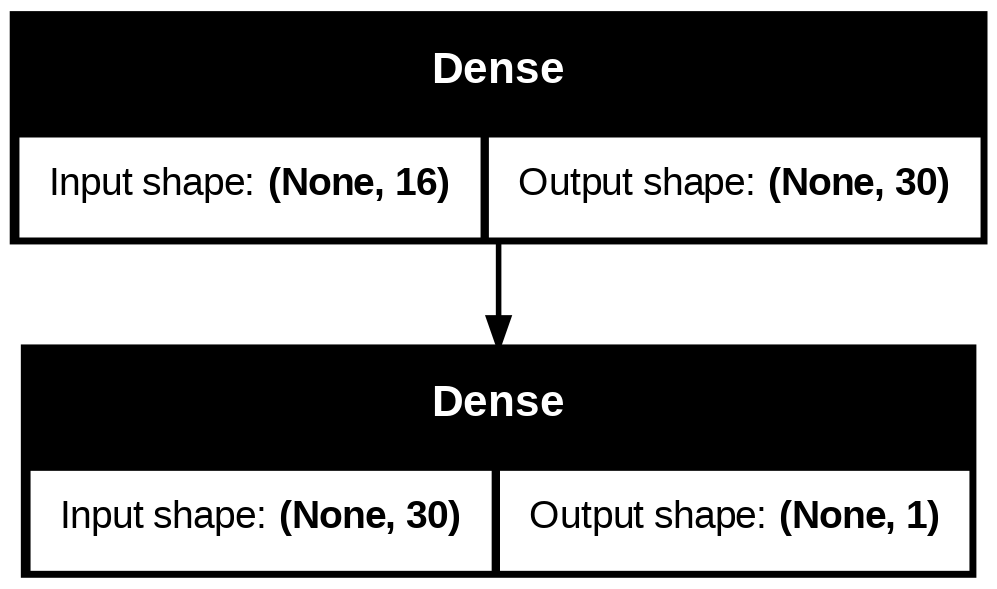

In [46]:
model = Sequential([
  Input(shape=(16,))
  ,Dense(30, activation='relu')
  ,Dense(1, activation= 'sigmoid')
])

# model.add(Dense(30, input_shape=(16,), activation='relu'))
# model.add(Dense(1, activation= 'sigmoid'))

model.summary()
plot_model(model,show_shapes=True)

### 4. 모델 실행

In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1530 - loss: 10.5358
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3157 - loss: 2.1042
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8507 - loss: 0.5340
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8421 - loss: 0.4552
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8575 - loss: 0.4148 


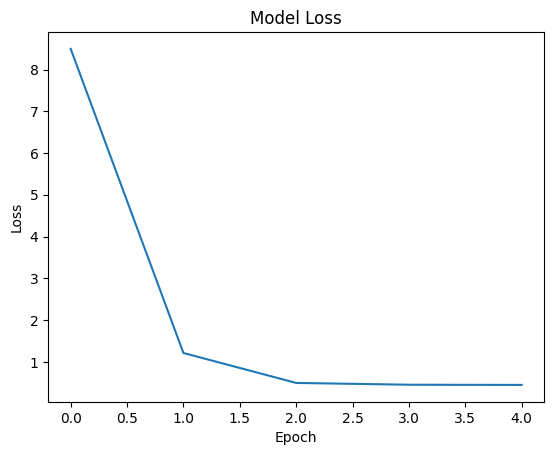

In [48]:
import matplotlib, matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

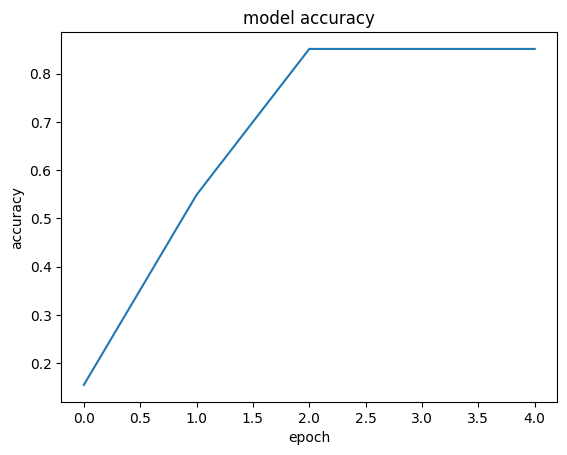

In [49]:
# @title 기본 제목 텍스트
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.show()

In [50]:
loss, accuracy = model.evaluate(X, y)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8313 - loss: 0.4812  
Test Loss: 0.4422
Test Accuracy: 0.8511
